In [1]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,10)

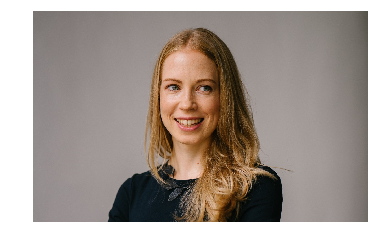

In [2]:
img = cv2.imread("face.jpg")
plt.imshow(img[:,:,::-1]);
plt.axis('off');

In [3]:
net = cv2.dnn.readNetFromCaffe("deploy.prototxt","res10_300x300_ssd_iter_140000_fp16.caffemodel")

In [4]:
def detect_faces(img,threshold):
    img_f = img.copy()
    h, w = img.shape[:2]
    blob = cv2.dnn.blobFromImage(image=img_f,scalefactor=1.0,size=(300,300),mean=[104.0, 177.0, 123.0],swapRB=False,crop=False)
    net.setInput(blob)
    detections = net.forward()
    detections_final = detections[0][0]
    faces = []
    for i in detections_final:
        if(i[2] >= threshold):
            x1 = int(i[3] * w)
            y1 = int(i[4] * h)
            x2 = int(i[5] * w)
            y2 = int(i[6] * h)
            w_face = x2 - x1
            h_face = y2 - y1
            faces.append((x1, y1, w_face, h_face))
    return np.array(faces).astype('int')

In [5]:
faces = detect_faces(img,threshold=0.9)

In [6]:
img_box = img.copy()
new_img = cv2.rectangle(img_box,(faces),(0,255,0),3)

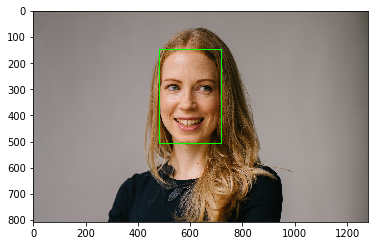

In [7]:
plt.imshow(new_img[:,:,::-1])

In [8]:
landmarkDetector = cv2.face.createFacemarkLBF()
model = './model/lbfmodel.yaml'
landmarkDetector.loadModel(model)

In [9]:
retval, landmarksList = landmarkDetector.fit(img, faces)

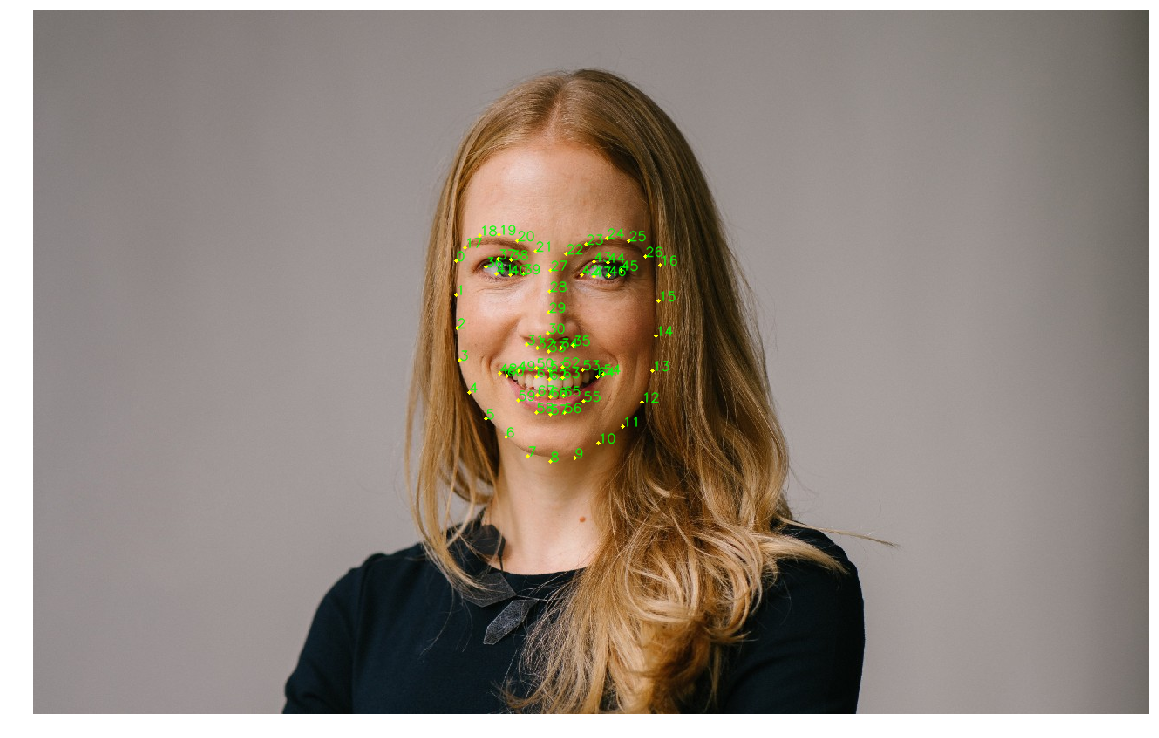

In [39]:
img_display = img.copy()
landmarks = landmarksList[0][0].astype(int)
#print(len(landmarks))
for idx in range(len(landmarks)):
    #print( landmarks[idx])
    cv2.circle(img_display, (landmarks[idx][0],landmarks[idx][1]), 2, (0,255,255), -1)
    cv2.putText(img_display, "{}".format(idx), (landmarks[idx][0],landmarks[idx][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
plt.figure(figsize=(20,20))
plt.imshow(img_display[:,:,::-1]); plt.axis('off');

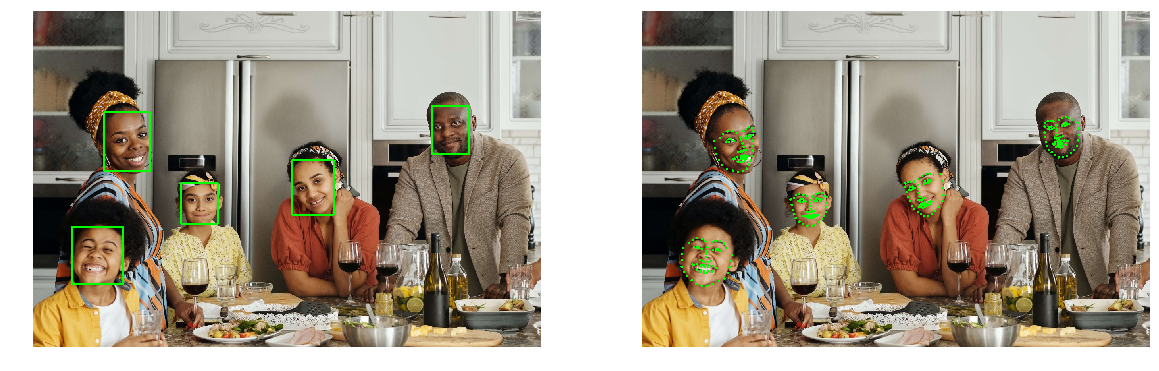

In [40]:
image_filename = 'family.jpg'
img_family = cv2.imread(image_filename)
img_display_faces = img_family.copy()
img_display_marks = img_family.copy()

# Detect the faces.
faces = detect_faces(img_family,threshold=0.7)

if len(faces) > 0:
    
    # Render bounding boxes.
    for face in faces:
        cv2.rectangle(img_display_faces, face, (0,255,0), 3)

    # Detect the facial landmarks.
    retval, landmarksList = landmarkDetector.fit(img_family, faces)

    # Render landmark points.
    for landmarks in landmarksList:
        cv2.face.drawFacemarks(img_display_marks, landmarks, (0, 255, 0))
        
    fig = plt.figure(figsize=(20,10))
    plt.subplot(121); plt.imshow(img_display_faces[...,::-1]); plt.axis('off');
    plt.subplot(122); plt.imshow(img_display_marks[...,::-1]); plt.axis('off');
else:
    print('No faces detected in image.')